In [1]:
import numpy as np

from roman_shear_sims.sim import make_sim
from roman_shear_sims.catalog import SimpleGalaxyCatalog
from roman_shear_sims.psf_makers import PSFMaker

In [2]:
import matplotlib.pyplot as plt

In [3]:
seed = 4242
rng = np.random.RandomState(seed)

simu_size = 301
img_size = 251
bands = ["Y106", "J129", "H158"]
gal_type = "exp"
psf_type = "roman"
layout_kind = "grid"
chromatic=False
spacing = 4.
buff = 50
noise_sig = 1e-3
n_gal = None
gal_mag = 25
gal_hlr = 0.2

g1_in = 0.02
g2_in = 0.0

n_epochs = 1

exp_time=107*6
oversamp_factor=6

### Set Galaxy Catalog

In [4]:
galaxy_catalog = SimpleGalaxyCatalog(
    simu_size,
    seed,
    gal_type=gal_type,
    mag=gal_mag,
    hlr=gal_hlr,
    layout_kind=layout_kind,
    exp_time=exp_time,
    spacing=spacing,
    buffer=buff,
    n_gal=n_gal,
    chromatic=chromatic,
)

### Set the PSF

In [5]:
psf_maker = PSFMaker(
    psf_type=psf_type,
    chromatic=chromatic,
)

### Run the simulation

In [6]:
simu_dict = make_sim(
    rng,
    galaxy_catalog,
    psf_maker,
    n_epochs=n_epochs,
    exp_time=exp_time,
    cell_size_pix=simu_size,
    oversamp_factor=oversamp_factor,
    bands=bands,
    g1=g1_in,
    g2=g2_in,
    chromatic=chromatic,
    simple_noise=True,
    noise_sigma=noise_sig,
    draw_method="fft",
    verbose=True,
)

Band loop:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch loop:   0%|          | 0/1 [00:00<?, ?it/s]

Obj loop:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch loop:   0%|          | 0/1 [00:00<?, ?it/s]

Obj loop:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch loop:   0%|          | 0/1 [00:00<?, ?it/s]

Obj loop:   0%|          | 0/36 [00:00<?, ?it/s]

### Show output

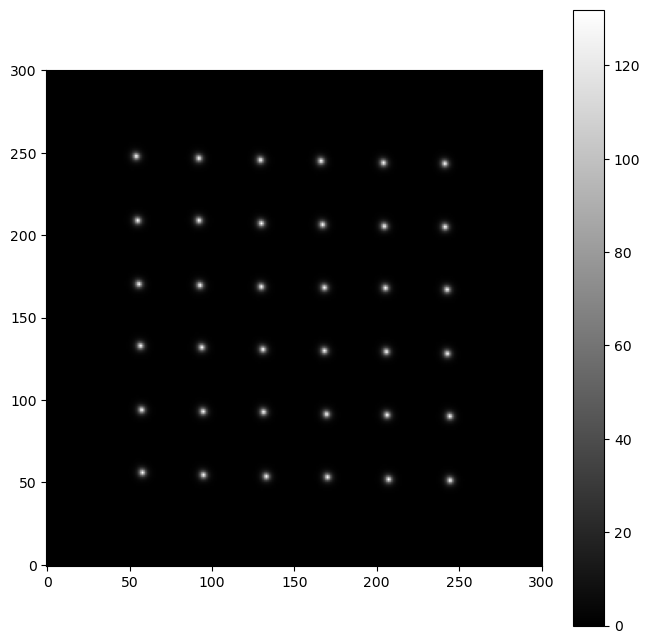

In [7]:
plt.figure(figsize=(8, 8))
plt.imshow(simu_dict["Y106"][0]["sci"][f"shear_{g1_in}_{g2_in}"], origin="lower", cmap="gray")
plt.colorbar()